# project 4
---
## Predicting The 2024 Presidential Election outcome with Machine Learning algorithms
---
### Data collection
---

**We will need a set of `Historical Presidential Election Data` composed of.**

- `Elections results` from 'kaggle' 
- `Demographic` data from the 'US Census Bureau'
- `Econimic Indicators` data from the 'Federal Reserve Economic Data(FRED)'
- `Pollind` data from 'FiveThirtyEight'.
---
**The data will covert the last 4 presidential elections and leading up to the 2024 Presidential election.**


#### 1-Importing election's data
---

In [4]:
# Importing dependencies
from pathlib import Path
import pandas as pd

# Defining the path to the csv file
file_path = Path('Resources/votes.csv')

# Reading the csv file into a pandas dataframe
votes_data = pd.read_csv(file_path)

# Displaying the dataframe
votes_data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [6]:
#drop the 'notes' column
votes_data = votes_data.drop(columns = ['notes'])

In [8]:
#Filtering data by year>=2008-2020
votes_data = votes_data.loc[votes_data['year'].isin([2008 , 2012 , 2020])]

# Filtering data by 'party_detailed'
votes_data = votes_data.loc[votes_data['party_detailed'].isin(['REPUBLICAN','DEMOCRAT'])]

votes_data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,party_simplified
2728,2008,ALABAMA,AL,1,63,41,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1266546,2099819,20210113,REPUBLICAN
2729,2008,ALABAMA,AL,1,63,41,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,813479,2099819,20210113,DEMOCRAT
2732,2008,ALASKA,AK,2,94,81,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,193841,326197,20210113,REPUBLICAN
2733,2008,ALASKA,AK,2,94,81,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,123594,326197,20210113,DEMOCRAT
2738,2008,ARIZONA,AZ,4,86,61,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1230111,2293475,20210113,REPUBLICAN


In [10]:
# Mapping the 'party_simplified' column
dict = {'REPUBLICAN':'REP',
        'DEMOCRAT':'DEM'}
votes_data['Party'] = votes_data['party_detailed'].map(dict)

In [12]:
# Dropping unwanted columns and all nulls
votes_data = votes_data.drop(columns = ['state','state_fips', 'state_cen', 'state_ic','office',
                                        'party_detailed','writein','version','party_simplified']).dropna()
votes_data.head()

,year,state_po,candidate,candidatevotes,totalvotes,Party
2728,2008,AL,"MCCAIN, JOHN",1266546,2099819,REP
2729,2008,AL,"OBAMA, BARACK H.",813479,2099819,DEM
2732,2008,AK,"MCCAIN, JOHN",193841,326197,REP
2733,2008,AK,"OBAMA, BARACK H.",123594,326197,DEM
2738,2008,AZ,"MCCAIN, JOHN",1230111,2293475,REP


In [14]:
#Renaming the columns
votes_df = votes_data.rename(columns = {'year':'Cycle','state_po':'State','candidate':'Candidate',
                     'candidatevotes':'Candidates Votes','totalvotes':'Total Votes','party':'Party'}).dropna()
votes_df.head()

,Cycle,State,Candidate,Candidates Votes,Total Votes,Party
2728,2008,AL,"MCCAIN, JOHN",1266546,2099819,REP
2729,2008,AL,"OBAMA, BARACK H.",813479,2099819,DEM
2732,2008,AK,"MCCAIN, JOHN",193841,326197,REP
2733,2008,AK,"OBAMA, BARACK H.",123594,326197,DEM
2738,2008,AZ,"MCCAIN, JOHN",1230111,2293475,REP


In [16]:
# Summary of the dataset
votes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2728 to 4281
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            305 non-null    int64 
 1   state_po        305 non-null    object
 2   candidate       305 non-null    object
 3   candidatevotes  305 non-null    int64 
 4   totalvotes      305 non-null    int64 
 5   Party           305 non-null    object
dtypes: int64(3), object(3)
memory usage: 16.7+ KB


---

#### 2-Importing Polls' data

---

In [21]:
# Importing dependencies
from pathlib import Path
import pandas as pd

# Defining the path to the csv file
path1 = Path('Resources/polls_data1.csv')
path2 = Path('Resources/polls_data2.csv')

# Reading the csv file into a pandas dataframe
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

# Displaying the dataframe
data1.head()

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,timestamp,comment,election_date,...,_defaultbasetime,_numloops,_state_houseeffects_weight,_state_trendline_weight,_out_of_state_house_discount,_house_effects_multiplier,_attenuate_endpoints,_nonlinear_polynomial_degree,_shortpoly_combpoly_weight,_nat_shortpoly_combpoly_weight
0,2016,Alabama,3/3/16,Donald Trump,9849,70.11138,68.63747,6/14/20 18:51,full archive 1968-2016,11/8/16,...,20,5,0.5,0.5,0.02,1,yes,2,0.8,0.5
1,2016,Alaska,3/3/16,Donald Trump,9849,51.63014,49.68174,6/14/20 18:51,full archive 1968-2016,11/8/16,...,20,5,0.5,0.5,0.02,1,yes,2,0.8,0.5
2,2016,Arizona,3/3/16,Donald Trump,9849,44.00000,41.02212,6/14/20 18:51,full archive 1968-2016,11/8/16,...,20,5,0.5,0.5,0.02,1,yes,2,0.8,0.5
3,2016,Colorado,3/3/16,Donald Trump,9849,45.95150,43.51193,6/14/20 18:51,full archive 1968-2016,11/8/16,...,20,5,0.5,0.5,0.02,1,yes,2,0.8,0.5
4,2016,Florida,3/3/16,Donald Trump,9849,46.54603,44.68674,6/14/20 18:51,full archive 1968-2016,11/8/16,...,20,5,0.5,0.5,0.02,1,yes,2,0.8,0.5


In [22]:
# Drop unwanted columns
data1 = data1.drop(columns = ['candidate_id','timestamp', 'comment',
       'election_date', 'election_qdate', 'last_qdate', 'last_enddate',
       '_medpoly2', 'trend_medpoly2', '_shortpoly0', 'trend_shortpoly0',
       'sum_weight_medium', 'sum_weight_short', 'sum_influence',
       'sum_nat_influence', '_minpoints', '_defaultbasetime', '_numloops',
       '_state_houseeffects_weight', '_state_trendline_weight',
       '_out_of_state_house_discount', '_house_effects_multiplier',
       '_attenuate_endpoints', '_nonlinear_polynomial_degree',
       '_shortpoly_combpoly_weight', '_nat_shortpoly_combpoly_weight'])
data1.head()                   

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2016,Alabama,3/3/16,Donald Trump,70.11138,68.63747
1,2016,Alaska,3/3/16,Donald Trump,51.63014,49.68174
2,2016,Arizona,3/3/16,Donald Trump,44.00000,41.02212
3,2016,Colorado,3/3/16,Donald Trump,45.95150,43.51193
4,2016,Florida,3/3/16,Donald Trump,46.54603,44.68674


In [25]:
# Displaying data2
data2.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/20,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/20,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/20,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/20,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/20,Joseph R. Biden Jr.,53.74120,53.72101


In [27]:
# Concatenating the dataframes
polls_data = pd.concat([data2 , data1],axis = 0)
polls_data.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/20,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/20,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/20,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/20,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/20,Joseph R. Biden Jr.,53.74120,53.72101


In [29]:
# Dropping column 'modeldate'
polls_data = polls_data.drop(columns = ['modeldate'])

In [31]:
#filtering data by cycle>=2008
polls_data = polls_data.loc[polls_data['cycle'].isin([2008 , 2012  , 2020])]                                                     

In [33]:
# Scratch pad
polls_data['candidate_name'].unique()

array(['Joseph R. Biden Jr.', 'Donald Trump',
       'Convention Bounce for Joseph R. Biden Jr.',
       'Convention Bounce for Donald Trump', 'Barack Obama',
       'Mitt Romney', 'John McCain'], dtype=object)

In [35]:
# Drpping ''Gary Johnson' records
polls_data = polls_data[polls_data['candidate_name'] != 'Gary Johnson']
polls_data.head()

,cycle,state,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,Joseph R. Biden Jr.,53.74120,53.72101


In [37]:
# Mapping the column candidate_name
dict = {'Joseph R. Biden Jr.':'BIDEN, JOSEPH R. JR',
        'Donald Trump':'TRUMP, DONALD J.',
        'Convention Bounce for Joseph R. Biden Jr.':'BIDEN, JOSEPH R. JR',
        'Convention Bounce for Donald Trump':'TRUMP, DONALD J.',
        'Hillary Rodham Clinton':'CLINTON, HILLARY',
        'Barack Obama':'OBAMA, BARACK H.',
        'Mitt Romney':'MITT, ROMNEY',
        'John McCain':'MCCAIN, JOHN'}

polls_data['Candidate'] = polls_data['candidate_name'].map(dict)
polls_data.head()

,cycle,state,candidate_name,pct_estimate,pct_trend_adjusted,Candidate
0,2020,Wyoming,Joseph R. Biden Jr.,30.81486,30.82599,"BIDEN, JOSEPH R. JR"
1,2020,Wisconsin,Joseph R. Biden Jr.,52.12642,52.09584,"BIDEN, JOSEPH R. JR"
2,2020,West Virginia,Joseph R. Biden Jr.,33.49125,33.51517,"BIDEN, JOSEPH R. JR"
3,2020,Washington,Joseph R. Biden Jr.,59.34201,59.39408,"BIDEN, JOSEPH R. JR"
4,2020,Virginia,Joseph R. Biden Jr.,53.74120,53.72101,"BIDEN, JOSEPH R. JR"


In [39]:
# Drop candidate_name column
polls_data = polls_data.drop(columns = ['candidate_name'])
polls_data.head()

,cycle,state,pct_estimate,pct_trend_adjusted,Candidate
0,2020,Wyoming,30.81486,30.82599,"BIDEN, JOSEPH R. JR"
1,2020,Wisconsin,52.12642,52.09584,"BIDEN, JOSEPH R. JR"
2,2020,West Virginia,33.49125,33.51517,"BIDEN, JOSEPH R. JR"
3,2020,Washington,59.34201,59.39408,"BIDEN, JOSEPH R. JR"
4,2020,Virginia,53.74120,53.72101,"BIDEN, JOSEPH R. JR"


In [41]:
# Rename the columns
polls_data = polls_data.rename(columns = {'cycle':'Cycle'})

# Reorganizing the columns and dropping all the null values
polls_data = polls_data[['Cycle','state','Candidate','pct_estimate','pct_trend_adjusted']].dropna()

# Supplying a dictionary to Map the state column
dict = {"Alabama": "AL", "Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT",
        "Delaware": "DE","Florida": "FL", "Georgia": "GA","Hawaii": "HI", "Idaho": "ID","Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
        "Kansas": "KS","Kentucky": "KY", "Louisiana": "LA","Maine": "ME","Maryland": "MD", "Massachusetts": "MA","Michigan": "MI",
        "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
        "New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC", "North Dakota": "ND","Ohio": "OH", "Oklahoma": "OK",
        "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
        "Texas": "TX", "Utah": "UT", "Vermont": "VT","Virginia": "VA", "Washington": "WA","West Virginia": "WV","Wisconsin": "WI", "Wyoming": "WY"
         }
# Mapping the state column
polls_data['State'] = polls_data['state'].map(dict)


# Sorting dataframe by 
polls_data = polls_data.sort_values(['State'])
                                    
#Displaying the dataframe
polls_data.head()

,Cycle,state,Candidate,pct_estimate,pct_trend_adjusted,State
67471,2008,Alaska,"MCCAIN, JOHN",47.043882,47.223445,AK
16831,2020,Alaska,"TRUMP, DONALD J.",49.750180,50.359770,AK
9286,2020,Alaska,"TRUMP, DONALD J.",49.543160,50.708460,AK
17997,2020,Alaska,"BIDEN, JOSEPH R. JR",46.009880,45.577140,AK
64411,2008,Alaska,"MCCAIN, JOHN",46.695031,44.780464,AK


In [43]:
# Dropping the 'State column
polls_data = polls_data.drop(columns = ['state'])
polls_data.head()

,Cycle,Candidate,pct_estimate,pct_trend_adjusted,State
67471,2008,"MCCAIN, JOHN",47.043882,47.223445,AK
16831,2020,"TRUMP, DONALD J.",49.750180,50.359770,AK
9286,2020,"TRUMP, DONALD J.",49.543160,50.708460,AK
17997,2020,"BIDEN, JOSEPH R. JR",46.009880,45.577140,AK
64411,2008,"MCCAIN, JOHN",46.695031,44.780464,AK


In [45]:
# Grouping dataframe by columns 'Cycle', 'State', 'Candidate' and calculating the mean of 'pct_estimate' and 'pct_trend_adjusted'
polls_df = polls_data.groupby(['Cycle', 'State', 'Candidate'])[['pct_estimate', 'pct_trend_adjusted']].mean().reset_index()

# Resetting the index and dropping the old index column
polls_df = polls_df.reset_index()

# Displaying the DataFrame
polls_df.head()

,index,Cycle,State,Candidate,pct_estimate,pct_trend_adjusted
0,0,2008,AK,"MCCAIN, JOHN",49.979379,49.966530
1,1,2008,AK,"OBAMA, BARACK H.",41.676065,41.580797
2,2,2008,AL,"MCCAIN, JOHN",57.202554,57.025843
3,3,2008,AL,"OBAMA, BARACK H.",34.602004,34.782441
4,4,2008,AR,"MCCAIN, JOHN",51.812752,51.540364


In [47]:
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               292 non-null    int64  
 1   Cycle               292 non-null    int64  
 2   State               292 non-null    object 
 3   Candidate           292 non-null    object 
 4   pct_estimate        292 non-null    float64
 5   pct_trend_adjusted  292 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 13.8+ KB


#### 3-Importing elections data
---

In [50]:
# Importing dependencies
from pathlib import Path
import pandas as pd

# Defining the path to the csv file
file_path = Path('Resources/elections_data.csv')

# Reading the csv file into a pandas dataframe
voters_data = pd.read_csv(file_path)

# Displaying the dataframe
voters_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Dropping unwanted columns
voters_data = voters_data.drop(columns = ['state_po','county_name', 'democrat', 'green',
       'liberitarian', 'other', 'republican', 'winner'])
voters_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,ctz_stat_2_freq,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,1.1,96.5,3.5,41.0,51.9,6.4,0.7,58.4,38.4,3.2
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,4.6,89.4,10.6,53.1,36.5,8.9,1.5,70.0,25.2,4.8
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,4.8,79.4,20.6,48.4,43.3,7.5,0.8,58.4,38.3,3.2
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,1.1,96.8,3.2,38.3,55.7,5.2,0.8,59.1,37.8,3.2
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,13.9,65.6,34.4,50.2,40.1,8.5,1.2,61.4,35.1,3.6


In [54]:
# import re
import re

# extracting the state fips codes from the county fips code with regex
voters_data['county_fips'] = voters_data['county_fips'].astype(str)
voters_data['state'] =  voters_data['county_fips'].str.extract(r'(\d{1,2})')[0]
voters_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,state
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,96.5,3.5,41.0,51.9,6.4,0.7,58.4,38.4,3.2,1
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,89.4,10.6,53.1,36.5,8.9,1.5,70.0,25.2,4.8,2
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,79.4,20.6,48.4,43.3,7.5,0.8,58.4,38.3,3.2,4
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,96.8,3.2,38.3,55.7,5.2,0.8,59.1,37.8,3.2,5
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,65.6,34.4,50.2,40.1,8.5,1.2,61.4,35.1,3.6,6


In [56]:
# Convert 'state' column to numeric values
voters_data['state'] = pd.to_numeric(voters_data['state'], errors='coerce')

In [58]:
# Mapping the 'county_fips'column values to their corresponding codes
state_dict = {
            1:'AL' , 2:'AK', 4:'AZ',5:'AR', 6:'CA' , 8:'CO' , 9:'CT' , 10:'DE', 11:'DC', 12:'FL', 13:'GA',
            15:'HI', 16:'ID',17:'IL', 18:'IN', 19:'IA', 20:'KS' , 21:'KY' , 22:'LA', 23:'ME' , 24:'MD' ,
            25:'MA' , 26:'MI' , 27:'MN' , 28:'MS', 29:'MO', 30:'MT' , 31:'NE', 32:'NV' , 33:'NH',34:'NJ', 35:'NM',
            36:'NY' , 37:'NC' , 38:'ND' , 39:'OH' , 40:'OK' ,41:'OR' , 42:'PA', 44:'RI', 45:'SC',46:'SD' ,
            47:'TN' , 48:'TX' , 49:'UT',50: 'VT',51:'VA' , 53:'WA' , 54:'WV' , 55:'WI', 56:'WY'
            }
# Mapping the sate_dict to the code column
voters_data['state'] = voters_data['state'].map(state_dict)

#Showing dataframe
voters_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,state
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,96.5,3.5,41.0,51.9,6.4,0.7,58.4,38.4,3.2,AL
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,89.4,10.6,53.1,36.5,8.9,1.5,70.0,25.2,4.8,AK
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,79.4,20.6,48.4,43.3,7.5,0.8,58.4,38.3,3.2,AZ
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,96.8,3.2,38.3,55.7,5.2,0.8,59.1,37.8,3.2,AR
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,65.6,34.4,50.2,40.1,8.5,1.2,61.4,35.1,3.6,CA


In [60]:
# Filter the dataset based on the specified conditions
voters_data = voters_data.loc[(voters_data['year'].isin([2008 , 2012 , 2020]))]
voters_data.tail()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,state
7521,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,94.4,5.6,50.9,40.7,7.8,0.6,56.3,42.3,1.4,WI
7522,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,91.4,8.6,56.1,33.2,9.1,1.7,61.6,37.6,0.8,WI
7523,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,93.1,6.9,59.8,26.5,12.9,0.8,60.7,37.3,2.0,WI
7524,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,96.1,3.9,51.1,41.3,7.2,0.4,56.9,41.5,1.6,WI
7525,2020,56000,28415.2,786.1,48.7,57943.3,94.9,5.1,49.7,50.3,...,93.9,6.1,54.1,36.3,8.5,1.0,59.3,37.9,2.8,WY


In [62]:
# renaming the columns
voters_data = voters_data.rename(columns = {
                                              'year':'Cycle','county_fips':'County FIP Code','inctot':'Avg Annual Income',
                                              'mortamt1':'Avg Mortgage','avrg_age':'Avg Age','ftotinc':'Avg Household Income',
                                              'foodstmp_1_freq':'% of With Foodstamps','foodstmp_2_freq':'% Without Foodstamps',	
                                              'sex_2_freq':'%Females','sex_1_freq':'%Males','marst_5_freq':'% Widowed',
                                              'marst_6_freq':'% Never Married','marst_1_freq':'% Married Spouse Present',
                                              'marst_4_freq':'% Divorced','marst_3_freq':'% Seperated','marst_2_freq':'% Married Spouse Absent',
                                              'race_1_freq':'% White','race_2_freq':'% Black','race_7_freq':'% Other Race',
                                              'race_8_freq':'% Two major Races','race_5_freq':'% Japanese','race_6_freq':'% Other Asian',
                                              'race_3_freq':'% Native Indian or Alaska','race_4_freq':'% Chinese','race_9_freq':'% Three or More Races',
                                              'ctz_stat_1_freq':'% Citizen','ctz_stat_3_freq':'% Non-Citizen','ctz_stat_2_freq':'% Naturalized Citizen',
                                              'lang_1_freq':'% Speak_English ','lang_2_freq':'% Other_Language','educ_attain_2.0_freq':'% Bachelor Degree',
                                              'educ_attain_1.0_freq':'% Lower Education','educ_attain_3.0_freq':'% Masters or Professional Certificate',
                                              'educ_attain_4.0_freq':'% Doctoral Degree','empstat_1.0_freq':'% Employed',
                                              'empstat_3.0_freq':'% Self_Employed','empstat_2.0_freq':'% Unemployed','state':'State'
                                            })

#Displaying the dataframe
voters_data.head()

,Cycle,County FIP Code,Avg Annual Income,Avg Mortgage,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,...,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed,State
1528,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,DE
1529,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,DE
1530,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,DE
1531,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,DE
1532,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,DE


In [64]:
# Sorting the DataFrame by 'Cycle' column
df = voters_data.sort_values('Cycle')

# Initializing an empty DataFrame to store the selected records
demographic_df = pd.DataFrame()

# Looping through each unique year in the DataFrame
for year in df['Cycle'].unique():

    # Selecting 98 records for each year
    selected_records = df[df['Cycle'] == year].head(98)

    # Appending the selected records to the demographic_data DataFrame
    demographic_df = pd.concat([demographic_df, selected_records])


# Displaying dataframe
demographic_df.head()

,Cycle,County FIP Code,Avg Annual Income,Avg Mortgage,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,...,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed,State
1528,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,DE
1816,2008,39007,20533.3,615.5,48.6,42049.6,83.4,16.6,49.7,50.3,...,95.2,4.8,34.2,61.9,4.0,0.0,52.8,42.3,4.9,OH
1815,2008,39000,23089.4,627.3,47.5,46910.6,91.5,8.5,52.1,47.9,...,96.2,3.8,39.0,55.1,5.3,0.6,59.1,37.2,3.7,OH
1814,2008,38017,27958.1,779.5,42.1,51107.7,96.7,3.3,49.3,50.7,...,94.6,5.4,64.5,29.4,5.7,0.4,73.4,24.4,2.2,ND
1813,2008,38000,25232.0,569.1,47.1,50156.5,95.1,4.9,50.8,49.2,...,95.3,4.7,52.2,43.6,3.8,0.4,64.7,33.7,1.6,ND


In [66]:
# Grouping the dataframe by 'Cycle','State','County FIP Code' and aggregating the remaining columns
demographic_df = demographic_df.groupby(['Cycle','State','County FIP Code'])[['Avg Annual Income', 'Avg Mortgage',
                                           'Avg Age', 'Avg Household Income', '% of With Foodstamps',
                                           '% Without Foodstamps', '%Females', '%Males', '% Widowed',
                                           '% Never Married', '% Married Spouse Present', '% Divorced',
                                           '% Seperated', '% Married Spouse Absent', '% White', '% Black',
                                           '% Other Race', '% Two major Races', '% Japanese', '% Other Asian',
                                           '% Native Indian or Alaska', '% Chinese', '% Three or More Races',
                                           '% Citizen', '% Non-Citizen', '% Naturalized Citizen',
                                           '% Speak_English ', '% Other_Language', '% Bachelor Degree',
                                           '% Lower Education', '% Masters or Professional Certificate',
                                           '% Doctoral Degree', '% Employed', '% Self_Employed', '% Unemployed']].mean().reset_index()
# Resetting the index of grouped by columns
demographic_df = demographic_df.reset_index()

In [68]:
#Scratch pad
demographic_df.columns

Index(['index', 'Cycle', 'State', 'County FIP Code', 'Avg Annual Income',
       'Avg Mortgage', 'Avg Age', 'Avg Household Income',
       '% of With Foodstamps', '% Without Foodstamps', '%Females', '%Males',
       '% Widowed', '% Never Married', '% Married Spouse Present',
       '% Divorced', '% Seperated', '% Married Spouse Absent', '% White',
       '% Black', '% Other Race', '% Two major Races', '% Japanese',
       '% Other Asian', '% Native Indian or Alaska', '% Chinese',
       '% Three or More Races', '% Citizen', '% Non-Citizen',
       '% Naturalized Citizen', '% Speak_English ', '% Other_Language',
       '% Bachelor Degree', '% Lower Education',
       '% Masters or Professional Certificate', '% Doctoral Degree',
       '% Employed', '% Self_Employed', '% Unemployed'],
      dtype='object')

In [70]:
# Reordering columns
demographic_df  = demographic_df[['Cycle','State','Avg Annual Income',
       'Avg Age', 'Avg Household Income', '% of With Foodstamps',
       '% Without Foodstamps', '%Females', '%Males', '% Widowed',
       '% Never Married', '% Married Spouse Present', '% Divorced',
       '% Seperated', '% Married Spouse Absent', '% White', '% Black',
       '% Other Race', '% Two major Races', '% Japanese', '% Other Asian',
       '% Native Indian or Alaska', '% Chinese', '% Three or More Races',
       '% Citizen', '% Non-Citizen', '% Naturalized Citizen',
       '% Speak_English ', '% Other_Language', '% Bachelor Degree',
       '% Lower Education', '% Masters or Professional Certificate',
       '% Doctoral Degree', '% Employed', '% Self_Employed', '% Unemployed']]

# Displaying the dataframe
demographic_df.head()

,Cycle,State,Avg Annual Income,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,% Widowed,...,% Naturalized Citizen,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed
0,2008,DE,22523.9,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,1.0,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6
1,2008,MT,30965.1,47.0,55952.1,95.9,4.1,51.5,48.5,6.3,...,0.5,96.6,3.4,50.5,42.2,6.7,0.6,68.0,30.2,1.9
2,2008,NC,25752.2,46.6,49159.5,91.6,8.4,52.7,47.3,8.1,...,2.0,92.8,7.2,47.2,43.9,7.6,1.2,58.3,38.1,3.7
3,2008,NC,24694.3,46.4,44626.6,94.0,6.0,54.7,45.3,8.7,...,2.1,91.7,8.3,47.1,47.3,4.6,1.1,63.4,33.6,3.0
4,2008,NC,31517.5,45.2,59729.9,94.8,5.2,52.2,47.8,6.7,...,1.8,91.4,8.6,51.0,42.5,5.5,1.0,68.5,28.2,3.3


#### 4-Importing Campaign finance data
---

In [73]:
# Importing dependencies
from pathlib import Path
import numpy as np
import pandas as pd

# Reading the csv files into a pandas dataframe
df1 =pd.read_csv(Path('Resources/file1.csv'))
df3 =pd.read_csv(Path('Resources/file3.csv'))
df5 =pd.read_csv(Path('Resources/file5.csv'))
df7 =pd.read_csv(Path('Resources/file7.csv'))


# Droping unwanted columns
df1 = df1.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df3 = df3.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df5 = df5.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df7 = df7.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])

# Storing the dataframes into a list
df = [df1,df3,df5,df7]

# Concatenating the dataframes into a single dataframe
finances_data = pd.concat(df,ignore_index=False)

# Extracting the year from link column using regular expression
finances_data['Cycle'] = finances_data['Link_Image'].str.extract(r'cycle=(\d{4})')[0]

# Displaying the dataframe
finances_data.head()


,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Cycle
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,7.786430e+08,7.603702e+08,18272367.39,434954.4,IL,...,5744310.2,300.0,11345.0,5755955.2,47945662.98,4.306975e+09,3.720067e+09,0.00,0.0,2008
1,https://www.fec.gov/data/candidate/H8FL05116/?...,"CASTAGNERO, CAROL",H8FL05116,H,DEM,0.000000e+00,2.760000e+02,0.00,0.0,FL,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.00,0.0,2008
2,https://www.fec.gov/data/candidate/H8FL06056/?...,"STEARNS, CLIFFORD B",H8FL06056,H,REP,8.064492e+05,7.897812e+05,2272965.45,0.0,FL,...,300.0,0.0,0.0,300.0,267040.00,5.845734e+05,5.108249e+05,2258097.63,0.0,2008
3,https://www.fec.gov/data/candidate/H8FL06080/?...,"CUNHA, TIMOTHY M",H8FL06080,H,DEM,2.497569e+05,2.497569e+05,0.00,0.0,FL,...,25.0,0.0,0.0,25.0,0.00,1.287319e+05,1.497160e+05,0.00,0.0,2008
4,https://www.fec.gov/data/candidate/H8FL07039/?...,"MALLOY, JAMES CLYDE",H8FL07039,H,DEM,3.055300e+04,2.967000e+04,0.00,16245.0,FL,...,0.0,0.0,0.0,0.0,1013.00,1.339800e+04,2.864700e+04,0.00,0.0,2008


In [75]:
#Filtering 'Cand_Office' == P
finances_data = finances_data.loc[(finances_data['Cand_Office'].isin(['P']))]

#Filtering dataframe by  'Cycle'<=2020
finances_data['Cycle'] = finances_data['Cycle'].astype(int)
finances_data = finances_data.loc[(finances_data['Cycle'].isin([2008 , 2012 , 2020]))]

# Filtering the data by Cand_Party_Affiliation
finances_data = finances_data.loc[(finances_data['Cand_Party_Affiliation'].isin(['DEM' , 'REP']))]

# Displaying the dataframe
finances_data.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Cycle
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,778642962.3,760370195.4,18272367.39,434954.4,IL,...,5744310.2,300.0,11345.0,5755955.2,47945662.98,4.306975e+09,3.720067e+09,0.0,0.0,2008
181,https://www.fec.gov/data/candidate/P00003236/?...,"PRATTAS, JAMES JOHN",P00003236,P,REP,0.0,0.0,0.00,0.0,HI,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.0,0.0,2008
183,https://www.fec.gov/data/candidate/P00003327/?...,"MOREAU, ROBERT EDWARD",P00003327,P,REP,0.0,0.0,0.00,0.0,CA,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.0,0.0,2008
222,https://www.fec.gov/data/candidate/P20000089/?...,"FELLURE, LOWELL JACKSON",P20000089,P,REP,3193.0,3193.0,590.00,111558.0,WV,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,590.0,NaN,2008
336,https://www.fec.gov/data/candidate/P20000329/?...,"CAPLETTE, RAYMOND JOSEPH",P20000329,P,DEM,0.0,0.0,0.00,0.0,AZ,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.0,0.0,2008


In [77]:
# Aggregating the contributions for each candidate
finances_data['Contributions'] = finances_data[['Individual_Itemized_Contribution',
                                           'Individual_Unitemized_Contribution',
                                           'Individual_Contribution',
                                           'Other_Committee_Contribution',
                                           'Party_Committee_Contribution',
                                           'Cand_Contribution','Total_Contribution',
                                           'Net_Contribution']].sum(axis=1)
# Aggregating the loans for each candidate
finances_data['Loans'] = finances_data[['Cand_Loan', 'Other_Loan','Total_Loan']].sum(axis = 1)

# Aggregating the refunds for each candidate
finances_data['Refunds'] = finances_data[['Individual_Refund','Party_Committee_Refund',
                                          'Other_Committee_Refund', 'Total_Contribution_Refund']].sum(axis = 1)

# Aggregating the Disbursements for each candidate
finances_data['Disbursements'] = finances_data[['Total_Disbursement','Exempt_Legal_Accounting_Disbursement',
                                                'Fundraising_Disbursement',
                                                'Other_Disbursements']].sum(axis = 1)

# Aggregating the Expenditures for each candidate
finances_data['Expenditures'] = finances_data[['Net_Operating_Expenditure','Operating_Expenditure',
                                               'Offsets_To_Operating_Expenditure']].sum(axis = 1)

# Aggregating the Repayments for each candidate
finances_data['Repayments'] = finances_data[['Cand_Loan_Repayment','Other_Loan_Repayment',
                                             'Total_Loan_Repayment']].sum(axis = 1)

# Aggregating the Receipts for each candidate
finances_data['Receipts'] = finances_data[['Total_Receipt','Other_Receipts']].sum(axis = 1)

# Aggregating the Cash_on_Hand for each candidate
finances_data['Cash_on_Hand'] = finances_data[['Cash_On_Hand_BOP','Cash_On_Hand_COP']].sum(axis = 1)

# Displaying dataframe
finances_data.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Debt_Owe_To_Committee,Cycle,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Cash_on_Hand
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,778642962.3,760370195.4,18272367.39,434954.4,IL,...,0.0,2008,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,18272367.39
181,https://www.fec.gov/data/candidate/P00003236/?...,"PRATTAS, JAMES JOHN",P00003236,P,REP,0.0,0.0,0.00,0.0,HI,...,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00
183,https://www.fec.gov/data/candidate/P00003327/?...,"MOREAU, ROBERT EDWARD",P00003327,P,REP,0.0,0.0,0.00,0.0,CA,...,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00
222,https://www.fec.gov/data/candidate/P20000089/?...,"FELLURE, LOWELL JACKSON",P20000089,P,REP,3193.0,3193.0,590.00,111558.0,WV,...,NaN,2008,0.000000e+00,3243.0,0.0,3.193000e+03,0.000000e+00,0.0,3.193000e+03,1180.00
336,https://www.fec.gov/data/candidate/P20000329/?...,"CAPLETTE, RAYMOND JOSEPH",P20000329,P,DEM,0.0,0.0,0.00,0.0,AZ,...,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00


In [79]:
# Dropping unwantted columns
finances_data = finances_data.drop(columns = ['Individual_Itemized_Contribution','Individual_Unitemized_Contribution', 'Cand_Name',
                                               'Individual_Contribution','Other_Committee_Contribution','Party_Committee_Contribution',
                                               'Cand_Contribution','Total_Contribution','Net_Contribution','Cand_Loan', 'Other_Loan',
                                               'Total_Loan','Individual_Refund','Party_Committee_Refund','Other_Committee_Refund',
                                               'Total_Contribution_Refund','Total_Disbursement','Exempt_Legal_Accounting_Disbursement',
                                               'Fundraising_Disbursement','Other_Disbursements','Net_Operating_Expenditure','Cand_Office',
                                               'Operating_Expenditure','Offsets_To_Operating_Expenditure','Cand_Loan_Repayment',
                                               'Other_Loan_Repayment','Total_Loan_Repayment','Total_Receipt','Other_Receipts',
                                               'Link_Image','Cand_Party_Affiliation','Cash_On_Hand_BOP','Cash_On_Hand_COP','Cand_Id'])
# Displaying dataframe
finances_data.head()

,Debt_Owed_By_Committee,Cand_State,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Cycle,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Cash_on_Hand
0,434954.4,IL,86950000.0,0.0,0.0,0.0,0.0,2008,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,18272367.39
181,0.0,HI,0.0,0.0,0.0,0.0,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00
183,0.0,CA,0.0,0.0,0.0,0.0,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00
222,111558.0,WV,0.0,0.0,0.0,0.0,NaN,2008,0.000000e+00,3243.0,0.0,3.193000e+03,0.000000e+00,0.0,3.193000e+03,1180.00
336,0.0,AZ,0.0,0.0,0.0,0.0,0.0,2008,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00


In [81]:
# Reorganizing the columns
finances_data = finances_data[[ 'Cycle','Debt_Owed_By_Committee','Transfer_From_Other_Auth_Committee',
                               'Offsets_To_Fundraising','Offsets_To_Leagal_Accounting','Transfer_To_Other_Auth_Committee',
                               'Debt_Owe_To_Committee','Contributions', 'Loans', 'Refunds',
                               'Disbursements','Expenditures', 'Repayments', 'Receipts']]
# Displaying dataframe
finances_data.head()

,Cycle,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
181,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
183,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
222,2008,111558.0,0.0,0.0,0.0,0.0,NaN,0.000000e+00,3243.0,0.0,3.193000e+03,0.000000e+00,0.0,3.193000e+03
336,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [83]:
df = finances_data.sort_values('Cycle')

# Initializing an empty DataFrame to store the selected records
finances_df = pd.DataFrame()

# Looping through each unique year in the DataFrame
for year in df['Cycle'].unique():
    
    # Selecting 98 records for each year
    selected_records = df[df['Cycle'] == year].head(98)
    
    # Appending the selected records to the finances_df DataFrame
    finances_df = pd.concat([finances_df, selected_records]).dropna()

# Displaying the dataframe
finances_df.head()

,Cycle,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1800,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1805,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1809,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1811,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


---
#### 5-Merging the datasets
---

In [86]:
#Adjusting length of the dataframes to match finances_df
votes_df = votes_df.iloc[:len(polls_df )] 
finances_df = finances_df.iloc[:len(polls_df )] 
demographic_df = demographic_df.iloc[:len(polls_df )] 

In [88]:
# Resetting dataframes indexes before concatenation
votes_df.reset_index(drop=True, inplace=True)
polls_df.reset_index(drop=True, inplace=True)
finances_df.reset_index(drop=True, inplace=True)
demographic_df.reset_index(drop=True, inplace=True)

In [90]:
votes_df.head()

,Cycle,State,Candidate,Candidates Votes,Total Votes,Party
0,2008,AL,"MCCAIN, JOHN",1266546,2099819,REP
1,2008,AL,"OBAMA, BARACK H.",813479,2099819,DEM
2,2008,AK,"MCCAIN, JOHN",193841,326197,REP
3,2008,AK,"OBAMA, BARACK H.",123594,326197,DEM
4,2008,AZ,"MCCAIN, JOHN",1230111,2293475,REP


In [92]:
polls_df.head()

,index,Cycle,State,Candidate,pct_estimate,pct_trend_adjusted
0,0,2008,AK,"MCCAIN, JOHN",49.979379,49.966530
1,1,2008,AK,"OBAMA, BARACK H.",41.676065,41.580797
2,2,2008,AL,"MCCAIN, JOHN",57.202554,57.025843
3,3,2008,AL,"OBAMA, BARACK H.",34.602004,34.782441
4,4,2008,AR,"MCCAIN, JOHN",51.812752,51.540364


In [94]:
# Merge the two DataFrames on Cycle, State, and Candidate columns
merged_df1 = votes_df.merge(polls_df, on=["Cycle", "State", "Candidate"])

# Drop the index column from the merged DataFrame
merged_d1f = merged_df1.drop('index', axis=1)


# Display the merged DataFrame
merged_df1.head()

,Cycle,State,Candidate,Candidates Votes,Total Votes,Party,index,pct_estimate,pct_trend_adjusted
0,2008,AL,"MCCAIN, JOHN",1266546,2099819,REP,2,57.202554,57.025843
1,2008,AL,"OBAMA, BARACK H.",813479,2099819,DEM,3,34.602004,34.782441
2,2008,AK,"MCCAIN, JOHN",193841,326197,REP,0,49.979379,49.966530
3,2008,AK,"OBAMA, BARACK H.",123594,326197,DEM,1,41.676065,41.580797
4,2008,AZ,"MCCAIN, JOHN",1230111,2293475,REP,6,51.211971,51.234748


In [96]:
# Dropping the index column
merged_df1 = merged_df1.drop(columns = ['index'])

In [98]:
# re_ordering the columns
merged_df1 = merged_df1[['Cycle','State','Candidate','Party','Candidates Votes','pct_estimate','pct_trend_adjusted']]
merged_df1.head()

,Cycle,State,Candidate,Party,Candidates Votes,pct_estimate,pct_trend_adjusted
0,2008,AL,"MCCAIN, JOHN",REP,1266546,57.202554,57.025843
1,2008,AL,"OBAMA, BARACK H.",DEM,813479,34.602004,34.782441
2,2008,AK,"MCCAIN, JOHN",REP,193841,49.979379,49.966530
3,2008,AK,"OBAMA, BARACK H.",DEM,123594,41.676065,41.580797
4,2008,AZ,"MCCAIN, JOHN",REP,1230111,51.211971,51.234748


In [100]:
# Concatenating 'demographic_df' and'finances_df'
merged_df2 = pd.concat([demographic_df , finances_df] , axis = 1)
merged_df2.head()

,Cycle,State,Avg Annual Income,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,% Widowed,...,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,DE,22523.9,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1,2008,MT,30965.1,47.0,55952.1,95.9,4.1,51.5,48.5,6.3,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,2008,NC,25752.2,46.6,49159.5,91.6,8.4,52.7,47.3,8.1,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,2008,NC,24694.3,46.4,44626.6,94.0,6.0,54.7,45.3,8.7,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,2008,NC,31517.5,45.2,59729.9,94.8,5.2,52.2,47.8,6.7,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [102]:
# Scratch pad
merged_df2.columns

Index(['Cycle', 'State', 'Avg Annual Income', 'Avg Age',
       'Avg Household Income', '% of With Foodstamps', '% Without Foodstamps',
       '%Females', '%Males', '% Widowed', '% Never Married',
       '% Married Spouse Present', '% Divorced', '% Seperated',
       '% Married Spouse Absent', '% White', '% Black', '% Other Race',
       '% Two major Races', '% Japanese', '% Other Asian',
       '% Native Indian or Alaska', '% Chinese', '% Three or More Races',
       '% Citizen', '% Non-Citizen', '% Naturalized Citizen',
       '% Speak_English ', '% Other_Language', '% Bachelor Degree',
       '% Lower Education', '% Masters or Professional Certificate',
       '% Doctoral Degree', '% Employed', '% Self_Employed', '% Unemployed',
       'Cycle', 'Debt_Owed_By_Committee', 'Transfer_From_Other_Auth_Committee',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Transfer_To_Other_Auth_Committee', 'Debt_Owe_To_Committee',
       'Contributions', 'Loans', 'Refunds', '

In [104]:
#Dropping unwanted columns
merged_df2 = merged_df2.drop(columns = ['Cycle', 'State','Cycle'])
merged_df2.head()

,Avg Annual Income,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,% Widowed,% Never Married,% Married Spouse Present,...,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,22523.9,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,56.4,...,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1,30965.1,47.0,55952.1,95.9,4.1,51.5,48.5,6.3,18.9,58.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,25752.2,46.6,49159.5,91.6,8.4,52.7,47.3,8.1,19.7,57.1,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,24694.3,46.4,44626.6,94.0,6.0,54.7,45.3,8.7,19.3,57.2,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,31517.5,45.2,59729.9,94.8,5.2,52.2,47.8,6.7,16.5,63.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [106]:
# Concatenating the dataframes and dropping all nulls
elections_df = pd.concat([merged_df1 , merged_df2], axis = 1).dropna()

# Displaying dataframe
elections_df.head()

,Cycle,State,Candidate,Party,Candidates Votes,pct_estimate,pct_trend_adjusted,Avg Annual Income,Avg Age,Avg Household Income,...,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008.0,AL,"MCCAIN, JOHN",REP,1266546.0,57.202554,57.025843,22523.9,47.0,44879.5,...,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1,2008.0,AL,"OBAMA, BARACK H.",DEM,813479.0,34.602004,34.782441,30965.1,47.0,55952.1,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,2008.0,AK,"MCCAIN, JOHN",REP,193841.0,49.979379,49.966530,25752.2,46.6,49159.5,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,2008.0,AK,"OBAMA, BARACK H.",DEM,123594.0,41.676065,41.580797,24694.3,46.4,44626.6,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,2008.0,AZ,"MCCAIN, JOHN",REP,1230111.0,51.211971,51.234748,31517.5,45.2,59729.9,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [108]:
#Scratch pad
elections_df['Candidate'].value_counts()

Candidate
OBAMA, BARACK H.       95
MCCAIN, JOHN           50
BIDEN, JOSEPH R. JR    44
TRUMP, DONALD J.       43
MITT, ROMNEY            1
Name: count, dtype: int64

In [110]:
#scratch pad
elections_df.columns

Index(['Cycle', 'State', 'Candidate', 'Party', 'Candidates Votes',
       'pct_estimate', 'pct_trend_adjusted', 'Avg Annual Income', 'Avg Age',
       'Avg Household Income', '% of With Foodstamps', '% Without Foodstamps',
       '%Females', '%Males', '% Widowed', '% Never Married',
       '% Married Spouse Present', '% Divorced', '% Seperated',
       '% Married Spouse Absent', '% White', '% Black', '% Other Race',
       '% Two major Races', '% Japanese', '% Other Asian',
       '% Native Indian or Alaska', '% Chinese', '% Three or More Races',
       '% Citizen', '% Non-Citizen', '% Naturalized Citizen',
       '% Speak_English ', '% Other_Language', '% Bachelor Degree',
       '% Lower Education', '% Masters or Professional Certificate',
       '% Doctoral Degree', '% Employed', '% Self_Employed', '% Unemployed',
       'Debt_Owed_By_Committee', 'Transfer_From_Other_Auth_Committee',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Transfer_To_Other_Auth_Comm

---

#### 6-Creating an Outcome column
---
**Search for the winners**

In [114]:
# Converting the 'Cycle column to integer
elections_df['Cycle'] = elections_df['Cycle'].astype(int)

# Defining our main political parties
Democratic = 'D'
Republican = 'R'

# Initializing an empty list to store winners
winners = []

# Looping through each row in the elections_df DataFrame
for i in range(len(elections_df)):
    candidate_name = elections_df.loc[i, 'Candidate']
    election_year = elections_df.loc[i, 'Cycle']
    
    if candidate_name == 'OBAMA, BARACK H.' and election_year == 2008:
        winners.append(1)
    elif candidate_name == 'OBAMA, BARACK H.' and election_year == 2012:
        winners.append(1)
    elif candidate_name == 'BIDEN, JOSEPH R. JR' and election_year == 2020:
        winners.append(1)
    else:
        winners.append(0)

# Appending the new column to the DataFrame
elections_df['Winner'] = winners

# Displaying the dataframe
elections_df.head()

,Cycle,State,Candidate,Party,Candidates Votes,pct_estimate,pct_trend_adjusted,Avg Annual Income,Avg Age,Avg Household Income,...,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Winner
0,2008,AL,"MCCAIN, JOHN",REP,1266546.0,57.202554,57.025843,22523.9,47.0,44879.5,...,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,0
1,2008,AL,"OBAMA, BARACK H.",DEM,813479.0,34.602004,34.782441,30965.1,47.0,55952.1,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1
2,2008,AK,"MCCAIN, JOHN",REP,193841.0,49.979379,49.966530,25752.2,46.6,49159.5,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0
3,2008,AK,"OBAMA, BARACK H.",DEM,123594.0,41.676065,41.580797,24694.3,46.4,44626.6,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1
4,2008,AZ,"MCCAIN, JOHN",REP,1230111.0,51.211971,51.234748,31517.5,45.2,59729.9,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0


---
#### 7-Exporting dataframe to sql and storing its path into a variable
----

In [121]:
#Importing the Required Libraries:
import pandas as pd
import sqlite3

#Connect to the SQLite Database:
conn = sqlite3.connect('elections_db')

#Write the DataFrame to the SQLite Database:
elections_df.to_sql('project4', conn, if_exists='replace', index=False)

#Closing the connection
conn.close()

## Models Creation
---

**Given the nature of our analysis which is a binary classification,we'll proceed as follow:**

- Preprocessing our dataset

- Creating a `random forest` model
- Creating a `Logistic Regression` model
- creating a `Neural network` model
- Optimize the model if needed

In [127]:
# Import the Required Libraries:
import pandas as pd
import sqlite3

#Connect to the SQLite Database:
conn = sqlite3.connect('elections_db')

# Query the Database and Load Data into a DataFrame:
query = "SELECT * FROM project4;"

#Loading the dataset to a pandas dataframe
elections_df = pd.read_sql_query(query, conn)

# Displaying the dataframe
elections_df.head()

,Cycle,State,Candidate,Party,Candidates Votes,pct_estimate,pct_trend_adjusted,Avg Annual Income,Avg Age,Avg Household Income,...,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Winner
0,2008,AL,"MCCAIN, JOHN",REP,1266546.0,57.202554,57.025843,22523.9,47.0,44879.5,...,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,0
1,2008,AL,"OBAMA, BARACK H.",DEM,813479.0,34.602004,34.782441,30965.1,47.0,55952.1,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1
2,2008,AK,"MCCAIN, JOHN",REP,193841.0,49.979379,49.966530,25752.2,46.6,49159.5,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0
3,2008,AK,"OBAMA, BARACK H.",DEM,123594.0,41.676065,41.580797,24694.3,46.4,44626.6,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1
4,2008,AZ,"MCCAIN, JOHN",REP,1230111.0,51.211971,51.234748,31517.5,45.2,59729.9,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0


### 1-Preprocessing the Data
---


In [130]:
# Importing Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

**Splitting our data**

---

In [132]:
# Dropping unwanted columns
elections_df = elections_df.drop(columns = ['State','Candidate','Party'])

In [135]:
# Defining our features set
X = elections_df.copy()
X.drop("Winner", axis=1, inplace=True)

 # Defining our target vector
y = elections_df["Winner"].ravel()

# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3 , random_state=1)


In [137]:
#scratch pad
X.head()

,Cycle,Candidates Votes,pct_estimate,pct_trend_adjusted,Avg Annual Income,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,...,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,1266546.0,57.202554,57.025843,22523.9,47.0,44879.5,90.6,9.4,53.4,...,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1,2008,813479.0,34.602004,34.782441,30965.1,47.0,55952.1,95.9,4.1,51.5,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,2008,193841.0,49.979379,49.966530,25752.2,46.6,49159.5,91.6,8.4,52.7,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,2008,123594.0,41.676065,41.580797,24694.3,46.4,44626.6,94.0,6.0,54.7,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,2008,1230111.0,51.211971,51.234748,31517.5,45.2,59729.9,94.8,5.2,52.2,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [139]:
 # instantiating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 2-Creating a Logistic Regression Model with the Original Data
---

**Creating , Fitting and validating a logistic regression model**

---

In [143]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs' , max_iter = 200 , random_state = 2)

# Fit the model using training data
classifier.fit(X_train , y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=2)

**Making predictions on the testing data labels by using the testing data (`X_test`) and the fitted model.**

---
- Generating the accuracy score
- Generating a confusion matrix.
- Printing the classification report.

In [146]:
# Evaluating model using accuracy_score()
from sklearn.metrics import accuracy_score
predictions = classifier.predict(X_test)

#Printing the accuracy test result
print(f" Logistic Regression Model Accuracy: {accuracy_score(y_test , predictions):.3f}")

 Logistic Regression Model Accuracy: 0.586


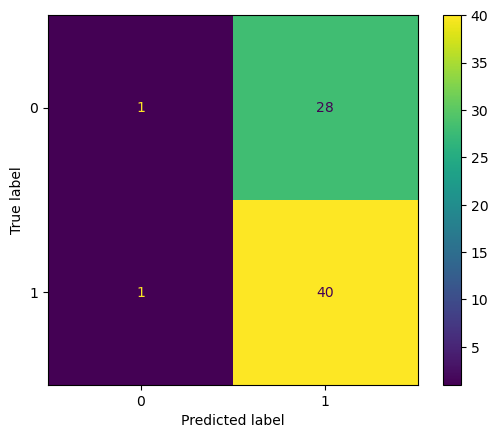

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generating a confusion matrix display from predictions
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [150]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = ['D', 'R']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           D       0.50      0.03      0.06        29
           R       0.59      0.98      0.73        41

    accuracy                           0.59        70
   macro avg       0.54      0.51      0.40        70
weighted avg       0.55      0.59      0.46        70



In [152]:
df.head()

,Cycle,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
1800,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1805,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1809,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1811,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00


<Axes: >

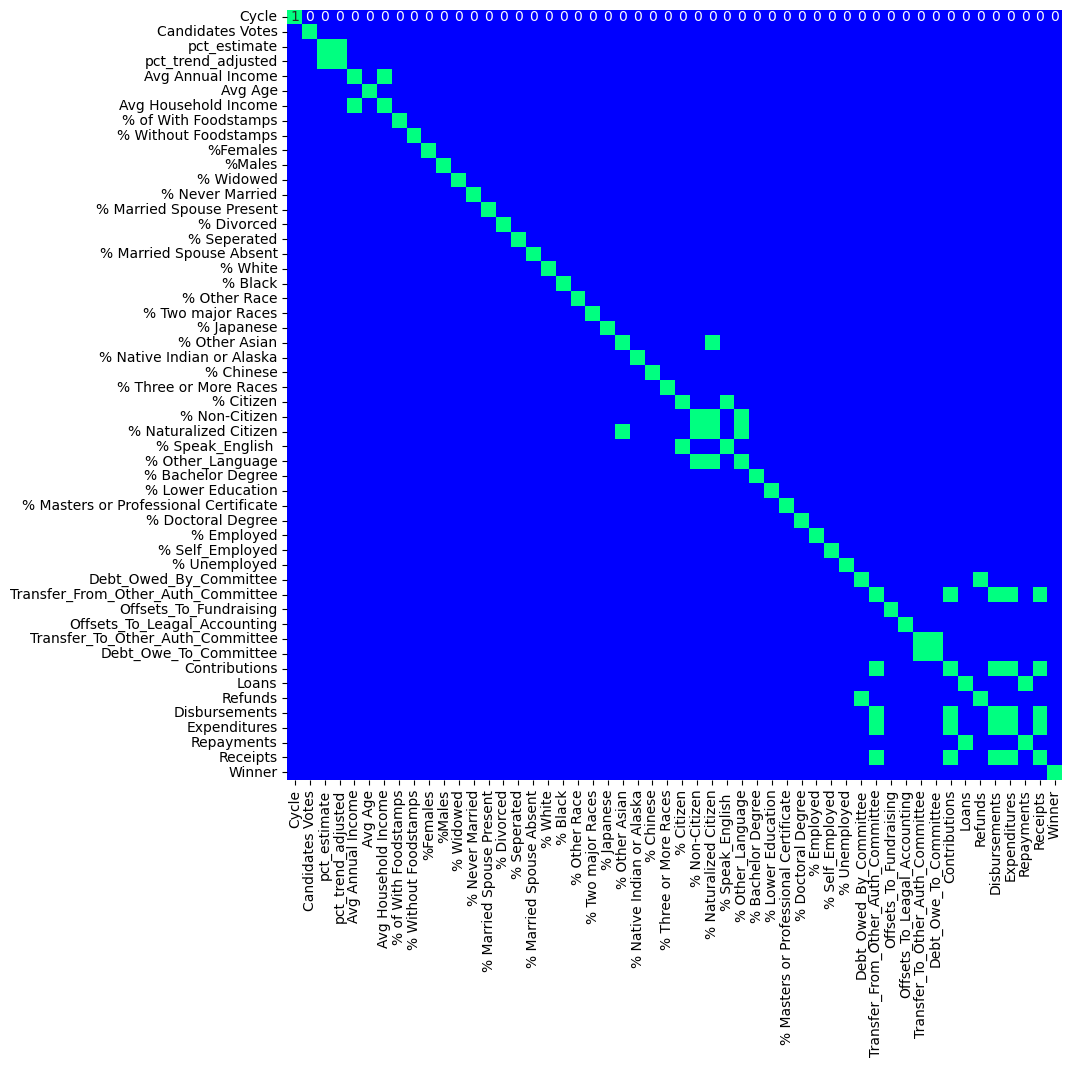

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
# convert to a DataFrame
df = elections_df

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False , cmap='winter')

#### 3-Creating a random forest model
---

In [157]:
#Dependencies
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [159]:
# Defining our features set
X = elections_df.copy()
X.drop("Winner", axis=1, inplace=True)

 # Defining our target vector
y = elections_df["Winner"].ravel()

# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [161]:

# Getting the unique classes in your target variable
unique_classes = np.unique(y_test)
unique_classes

array([0, 1])

In [163]:
 # instantiating StandardScaler 
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Fitting the Random Forest Model**

---

In [166]:
# Instantiating a Random Forest Classifier
psychic = RandomForestClassifier(n_estimators=100, random_state=1)

In [168]:
# Fitting the rm_model
psychic = psychic.fit(X_train_scaled, y_train.ravel())

**Making Predictions with the Random Forest Model**

---

In [171]:
# Making predictions using the testing data
reading = psychic.predict(X_test_scaled)

**Evaluating our model**

---
`This step involves the following`
- Calcculating the `confusion Matrix`
- Calculating the `Accuracy Score`

In [174]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, reading , labels=unique_classes)
cm_df = pd.DataFrame(
    cm , index=unique_classes, columns=unique_classes
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, reading) 

In [176]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,0,1
0,9,20
1,11,30


Accuracy Score : 0.5571428571428572
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        29
           1       0.59      0.98      0.73        41

    accuracy                           0.59        70
   macro avg       0.54      0.51      0.40        70
weighted avg       0.55      0.59      0.46        70



In [178]:
# Calculating the feature importance with Random Forests
importances = psychic.feature_importances_

# Sorting the features by their importance
sorted(zip(psychic.feature_importances_, X.columns), reverse=True)

[(0.03946121847391226, '% Bachelor Degree'),
 (0.03782525893423067, '% Masters or Professional Certificate'),
 (0.03432279872562716, '% Naturalized Citizen'),
 (0.033169296543506914, '% Lower Education'),
 (0.03266385629723531, '% Married Spouse Present'),
 (0.03233910568370511, '% Self_Employed'),
 (0.03189998223203949, 'Avg Household Income'),
 (0.031269287037536585, '% Unemployed'),
 (0.0307895535445348, '% Never Married'),
 (0.03034580261555456, '% Black'),
 (0.029671209308014306, '% Two major Races'),
 (0.02936896237303063, '% Seperated'),
 (0.02863604870548382, '% Employed'),
 (0.02849500477798974, '% White'),
 (0.02644608206979723, 'Candidates Votes'),
 (0.026431958541709186, 'pct_estimate'),
 (0.026168482127955646, '%Females'),
 (0.025868954655469806, 'Avg Annual Income'),
 (0.02575082758871506, '% Married Spouse Absent'),
 (0.025464921660221615, '% Divorced'),
 (0.024041242249679996, '% Other Race'),
 (0.023813404509248418, 'Avg Age'),
 (0.023170757522388848, '% Other Asian'),

<Axes: title={'center': 'Features Importances'}, xlabel='1'>

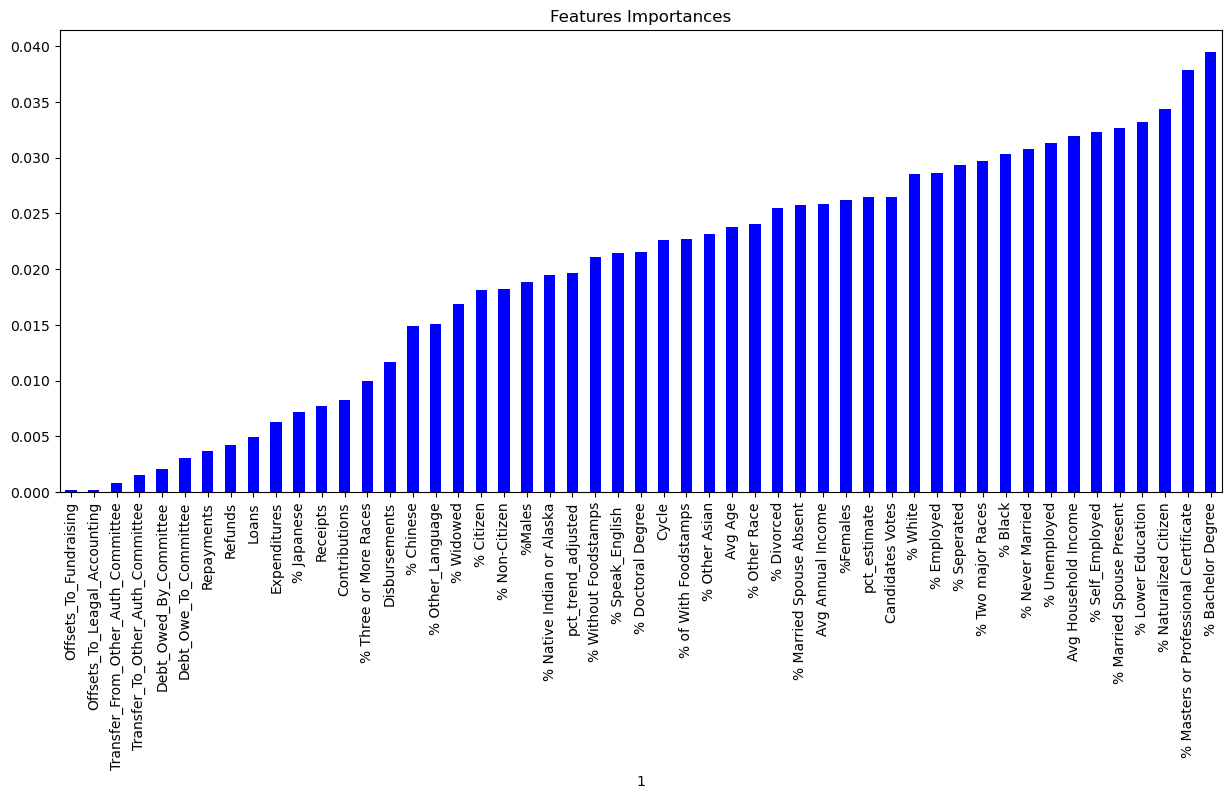

In [180]:
# Visualizing the features by their importance
importances_df = pd.DataFrame(sorted(zip(psychic.feature_importances_, X.columns)))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='bar', color='blue', title= 'Features Importances', legend=False , figsize=(15, 6))

---

#### 4-Creating a Neural Network Model
---

**Initializing a StandardScaler instance**

In [185]:
 # Import our dependencies
import pandas as pd
import sklearn as skl
import tensorflow as tf

In [186]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting/training the model
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---
**Compiling, Training and Evaluateing the Model**

In [188]:
# Scratch pad
X_train_scaled.shape

(163, 51)

In [189]:
# Defining the model - deep neural
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5


psychic = tf.keras.models.Sequential()

# First hidden layer
psychic.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation="relu", input_dim =51))

# Second hidden layer
psychic.add(tf.keras.layers.Dense(units = hidden_nodes_layer2 , activation = "sigmoid" ))

# Output layer
psychic.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
psychic.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467 (1.82 KB)

 Trainable params: 467 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Compiling the model
psychic.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [191]:
# Training the model
fit_model = psychic.fit(X_train_scaled , y_train , epochs = 100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.3739 - loss: 0.7324
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.4099 - loss: 0.7167
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.4151 - loss: 0.7165
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.4539 - loss: 0.7128
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4457 - loss: 0.7108
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4867 - loss: 0.6980
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.4751 - loss: 0.6993
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4941 - loss: 0.6946
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5675 - loss: 0.6932
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.4573 - loss: 0.6969
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5463 - loss: 0.6889
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy:

In [194]:
# Evaluate the model using the test data
model_loss, model_accuracy = psychic.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - 16ms/step - accuracy: 0.5571 - loss: 0.6726
Loss: 0.6726134419441223, Accuracy: 0.5571428537368774


---
### Model Optimization
---

In [205]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    psychic_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    psychic_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=51))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        psychic_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    psychic_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    psychic_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return psychic_model

In [207]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [209]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 02s]
val_accuracy: 0.5857142806053162

Best val_accuracy So Far: 0.6571428775787354
Total elapsed time: 00h 01m 02s


In [210]:
 # Get best model hyperparameters
hyper_psychic = tuner.get_best_hyperparameters(1)[0]
hyper_psychic.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 3,
 'units_2': 1,
 'units_3': 5,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [211]:
best_psychic = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_psychic.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - 25ms/step - accuracy: 0.6571 - loss: 0.6637
Loss: 0.6637149453163147, Accuracy: 0.6571428775787354


In [212]:
# Exporting our model to HDF5 file
psychic.save("Project4.h5")